# Early Detection of Alzheimer Disease 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the CSV file in the 'originaldataset'.
originaldataset=pd.read_csv("MMSE Dataset.csv")

In [3]:
#checking the loaded dataset
originaldataset.head()

,Subject,IntraCranialVol,CortexVol,TotalGrayVol,CorticalWhiteMatterVol,TOTAL_HIPPOCAMPUS_VOLUME,mmse,Group,cdr,dx1,apoe,Age,Education,Race,M/F
0,OAS30001,1136503.981,379446.1801,517683.1801,367262.9335,7678.9,29,NormalCognition,0.0,Cognitively normal,23.0,65.50,12.0,Caucasian,F
1,OAS30001,1134037.255,362040.1509,500699.1509,373376.7702,7648.2,29,NormalCognition,0.0,Cognitively normal,23.0,67.22,12.0,Caucasian,F
2,OAS30001,1238313.360,357784.4896,487405.4896,354128.7815,7105.9,29,NormalCognition,0.0,Cognitively normal,23.0,71.80,12.0,Caucasian,F
3,OAS30001,1186090.901,359975.2576,491102.2576,347616.3416,6861.9,29,NormalCognition,0.0,Cognitively normal,23.0,73.72,12.0,Caucasian,F
4,OAS30002,1727245.999,471180.9506,628934.9506,511207.5550,8860.3,29,NormalCognition,0.0,Cognitively normal,34.0,68.99,18.0,Caucasian,M


# Data Preprocessing

In [4]:
#checking the information about the dataset
print(originaldataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subject                   2011 non-null   object 
 1   IntraCranialVol           2011 non-null   float64
 2   CortexVol                 2011 non-null   float64
 3   TotalGrayVol              2011 non-null   float64
 4   CorticalWhiteMatterVol    2011 non-null   float64
 5   TOTAL_HIPPOCAMPUS_VOLUME  2011 non-null   float64
 6   mmse                      2011 non-null   int64  
 7   Group                     2011 non-null   object 
 8   cdr                       2011 non-null   float64
 9   dx1                       2011 non-null   object 
 10  apoe                      1989 non-null   float64
 11  Age                       1965 non-null   float64
 12  Education                 2005 non-null   float64
 13  Race                      2011 non-null   object 
 14  M/F     

In [5]:
#above we have 14 columns other than index

In [6]:
#checking the nulls
originaldataset.isna().sum() 

Subject                      0
IntraCranialVol              0
CortexVol                    0
TotalGrayVol                 0
CorticalWhiteMatterVol       0
TOTAL_HIPPOCAMPUS_VOLUME     0
mmse                         0
Group                        0
cdr                          0
dx1                          0
apoe                        22
Age                         46
Education                    6
Race                         0
M/F                          0
dtype: int64

## Imputation

In [7]:
#filling out the missing values by most frequent values in the columns
from sklearn.impute import SimpleImputer

imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

In [8]:
imputer.fit(originaldataset[['Age']])
originaldataset[['Age']] = imputer.fit_transform(originaldataset[['Age']])

In [9]:
imputer.fit(originaldataset[['apoe']])
originaldataset[['apoe']] = imputer.fit_transform(originaldataset[['apoe']])

In [10]:
imputer.fit(originaldataset[['Education']])
originaldataset[['Education']] = imputer.fit_transform(originaldataset[['Education']])

In [11]:
#Converting M/F column into 0, 1. 0 for female, 1 for male.
originaldataset['M/F'] = originaldataset['M/F'].replace(['F','M'], [0,1]) # M/F column

In [12]:
# Check missing values by each column
pd.isnull(originaldataset).sum() 

Subject                     0
IntraCranialVol             0
CortexVol                   0
TotalGrayVol                0
CorticalWhiteMatterVol      0
TOTAL_HIPPOCAMPUS_VOLUME    0
mmse                        0
Group                       0
cdr                         0
dx1                         0
apoe                        0
Age                         0
Education                   0
Race                        0
M/F                         0
dtype: int64

### About Target Column "Group"

In [13]:
#checking out our target column and its unique value
#The MMSE has a maximum score of 30 points. The scores are generally grouped as follows:
"""
25-30 points	Normal Cognition
21-24 points	Mild dementia
10-20 points	Moderate dementia
9 points or lower	Severe dementia
"""
pd.unique(originaldataset['Group'])

array(['NormalCognition', 'ModerateDementia', 'MildDementia',
       'SevereDementia'], dtype=object)

# EXPLORATORY DATA ANALYSIS (EDA)

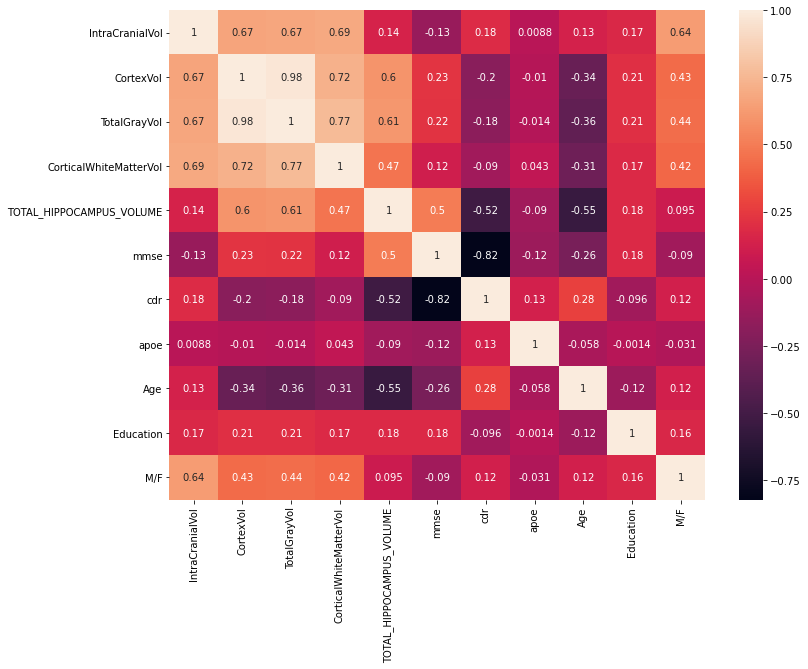

In [14]:
#checking correlations with heatmap.
cor = originaldataset.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)
plt.show()

In [15]:
# Above we can check the correlation of every column against MMSE, The TOTAL HIPPOCAMPUS VOLUME seems most positive coorelated
#AND CDR seems highly negatively correlated.

In [16]:
#before moving on further changing the name of dataset from 'originaldataset' to 'df'.
df=originaldataset

In [17]:
# bar drawing function
def bar_chart(feature):
    NormalCognition = df[df['Group']=="NormalCognition"][feature].value_counts()
    ModerateDementia = df[df['Group']=="ModerateDementia"][feature].value_counts()
    MildDementia = df[df['Group']=="MildDementia"][feature].value_counts()
    SevereDementia = df[df['Group']=="SevereDementia"][feature].value_counts()
    df_bar = pd.DataFrame([NormalCognition,ModerateDementia,MildDementia,SevereDementia])
    df_bar.index = ['NormalCognition','ModerateDementia','MildDementia','SevereDementia']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and MMSE')

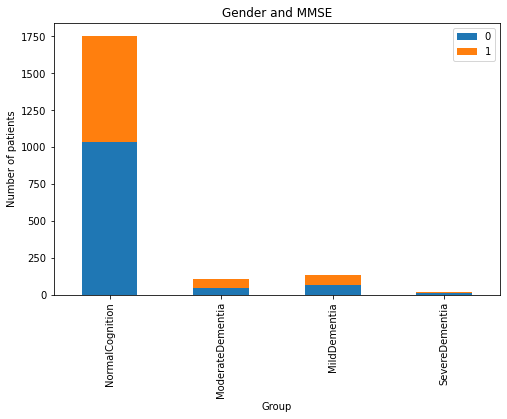

In [18]:
# Gender(M/F)  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and MMSE')

#below generally we can see that male proportion are having less MMSE values.

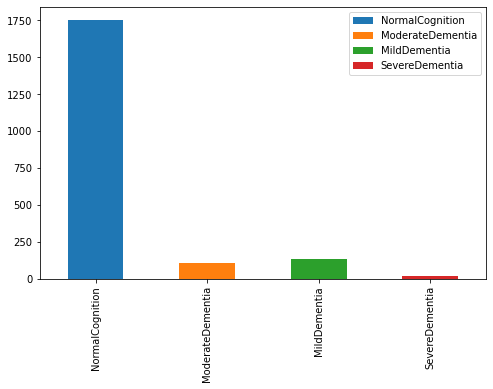

In [19]:
#Target column Group
bar_chart('Group')
#in the below graph we can see that data have maximum number of people with normal cognition condition.
#with very few in severe dementia

In [20]:
#Counts of values of each kind in Group
originaldataset['Group'].value_counts()

NormalCognition     1754
MildDementia         135
ModerateDementia     106
SevereDementia        16
Name: Group, dtype: int64

(0.3, 30.0)

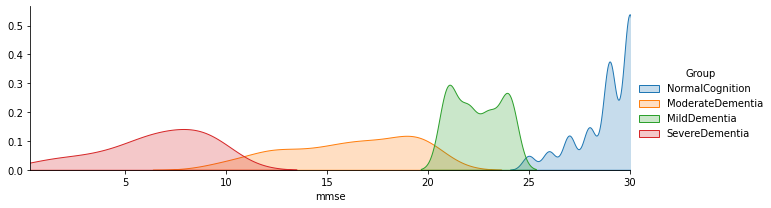

In [21]:
#MMSE : Mini Mental State Examination
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'mmse',shade= True)
facet.set(xlim=(0, df['mmse'].max()))
facet.add_legend()
plt.xlim(0.30)

#we can see how the range of each group is distributed. 

(50.0, 100.0)

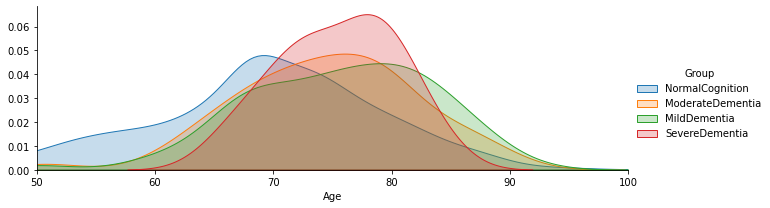

In [22]:
#AGE
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

#below we can observe that age 70-85, more people are having dementia than any other age group.

(0.0, 0.2)

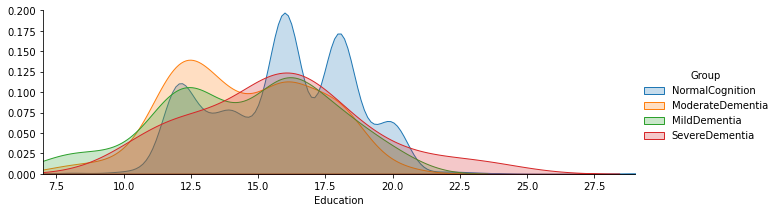

In [23]:
#'EDUC' = Years of Education

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Education',shade= True)
facet.set(xlim=(df['Education'].min(), df['Education'].max()))
facet.add_legend()
plt.ylim(0, 0.2)

#below, we can observe the mix trends but by correlation as well as some trend we see that the dementia decreasae with education level.

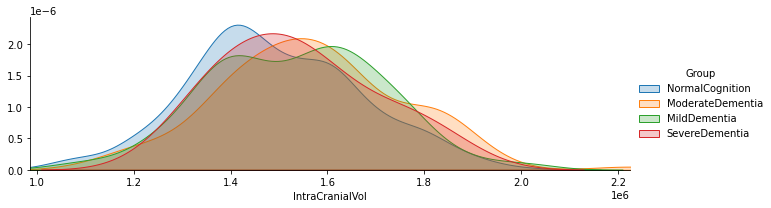

In [24]:
#'IntraCranialVol' 
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'IntraCranialVol',shade= True)
facet.set(xlim=(df['IntraCranialVol'].min(), df['IntraCranialVol'].max()))
facet.add_legend()

#by seeing the heat map correlation and the below graph as dementia increases the IntraCranial Volume increases.
#demetia increase, MMSE decrease therefore IntraCranialVol increase according to correlation.

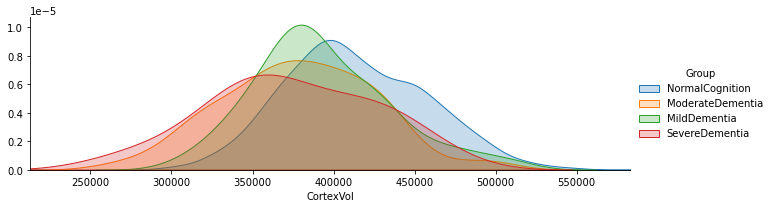

In [25]:
#'CortexVol' 

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'CortexVol',shade= True)
facet.set(xlim=(df['CortexVol'].min(), df['CortexVol'].max()))
facet.add_legend()

#below, demented people are having less cortex volume than normal one.

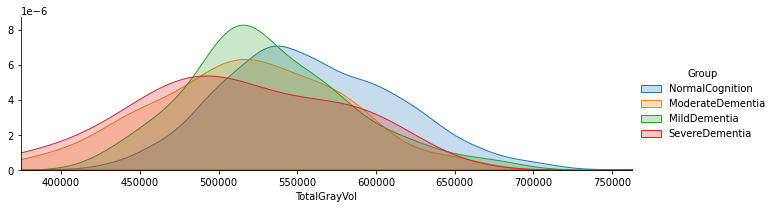

In [26]:
#'TotalGrayVol'
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'TotalGrayVol',shade= True)
facet.set(xlim=(df['TotalGrayVol'].min(), df['TotalGrayVol'].max()))
facet.add_legend()
#below, severe and moderate demented have comparitively low volumes.

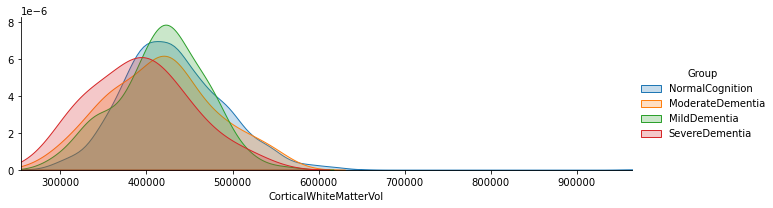

In [27]:
#'CorticalWhiteMatterVol'
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'CorticalWhiteMatterVol',shade= True)
facet.set(xlim=(df['CorticalWhiteMatterVol'].min(), df['CorticalWhiteMatterVol'].max()))
facet.add_legend()
#most of the severe demented are having less volume than others.

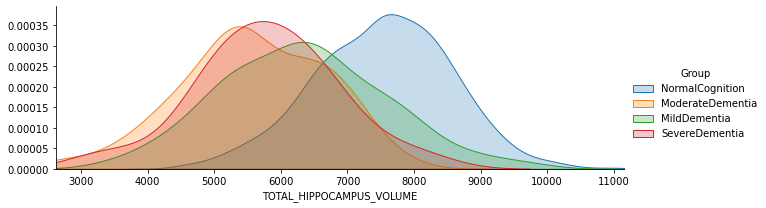

In [28]:
#'TOTAL_HIPPOCAMPUS_VOLUME'

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'TOTAL_HIPPOCAMPUS_VOLUME',shade= True)
facet.set(xlim=(df['TOTAL_HIPPOCAMPUS_VOLUME'].min(), df['TOTAL_HIPPOCAMPUS_VOLUME'].max()))
facet.add_legend()

#below it is shown very clearly the people with some dementia have lower hippocampus volume than the normal one. 

Text(0.5, 1.0, 'CDR and MMSE')

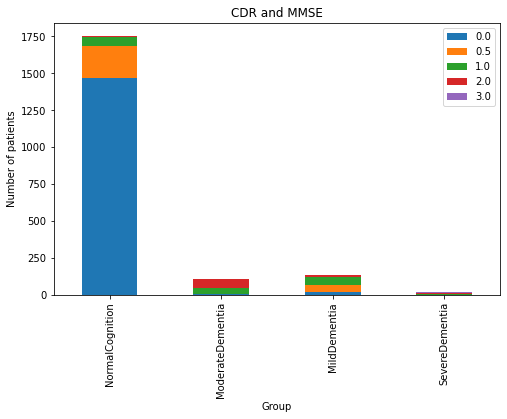

In [29]:
#'CDR'
bar_chart('cdr')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('CDR and MMSE')

#we can see distribution of cdr values across group.

Text(0.5, 1.0, 'Race and Demented rate')

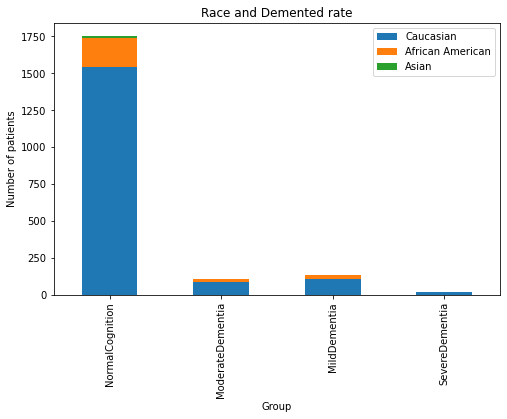

In [30]:
# Race and  Group ( Female=0, Male=1)
bar_chart('Race')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Race and Demented rate')
#below we can see the people races and group distribution in data.

# Getting Data Ready for building models

In [31]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Subject                   2011 non-null   object 
 1   IntraCranialVol           2011 non-null   float64
 2   CortexVol                 2011 non-null   float64
 3   TotalGrayVol              2011 non-null   float64
 4   CorticalWhiteMatterVol    2011 non-null   float64
 5   TOTAL_HIPPOCAMPUS_VOLUME  2011 non-null   float64
 6   mmse                      2011 non-null   int64  
 7   Group                     2011 non-null   object 
 8   cdr                       2011 non-null   float64
 9   dx1                       2011 non-null   object 
 10  apoe                      2011 non-null   float64
 11  Age                       2011 non-null   float64
 12  Education                 2011 non-null   float64
 13  Race                      2011 non-null   object 
 14  M/F     

In [32]:
#target column
df['Group'].value_counts()

NormalCognition     1754
MildDementia         135
ModerateDementia     106
SevereDementia        16
Name: Group, dtype: int64

In [33]:
# Drop unnecessary columns MMSE is already distributed in the 4 levels in Group
df = df.drop(['Subject', 'mmse', 'dx1','Race'], axis=1) 

In [34]:
df.info()
#left with 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IntraCranialVol           2011 non-null   float64
 1   CortexVol                 2011 non-null   float64
 2   TotalGrayVol              2011 non-null   float64
 3   CorticalWhiteMatterVol    2011 non-null   float64
 4   TOTAL_HIPPOCAMPUS_VOLUME  2011 non-null   float64
 5   Group                     2011 non-null   object 
 6   cdr                       2011 non-null   float64
 7   apoe                      2011 non-null   float64
 8   Age                       2011 non-null   float64
 9   Education                 2011 non-null   float64
 10  M/F                       2011 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 172.9+ KB


In [35]:
#Creating a target dataframe
y=df['Group'].values

In [36]:
#checking out the shape and values
print(y.shape)
print(y)

(2011,)
['NormalCognition' 'NormalCognition' 'NormalCognition' ...
 'ModerateDementia' 'NormalCognition' 'NormalCognition']


In [37]:
#creating the X dataframe which contains all other columns
X=df[['IntraCranialVol','CortexVol','TotalGrayVol','CorticalWhiteMatterVol','TOTAL_HIPPOCAMPUS_VOLUME','cdr','apoe','Age','Education','M/F']]

In [38]:
print(X.shape)

(2011, 10)


# Splitting Train/Validation/Test Sets

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score


In [40]:
# splitting into two sets
#training and testing sets

X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, y, random_state=42)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

In [41]:
#shapes of training and test datasets.
print(X_trainval_scaled_dna.shape)
print(X_test_scaled_dna.shape)
print(Y_trainval_dna.shape)
print(Y_test_dna.shape)

(1508, 10)
(503, 10)
(1508,)
(503,)


# Models

In [42]:
#installing useful libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [43]:
acc = [] # list to store all performance metric

# Logistic Regression

In [44]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_trainval_scaled_dna, Y_trainval_dna)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [45]:
lmscore=lm.score(X_test_scaled_dna, Y_test_dna)
print("Test accuracy is ", lmscore)


Test accuracy is  0.8807157057654076


# Decision Tree

In [46]:
best_score = 0
kfolds=5 # set the number of folds

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled_dna, Y_trainval_dna )

test_score = SelectedDTModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedDTModel.predict(X_test_scaled_dna)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)


Best accuracy on validation set is: 0.9084926624276694
Best parameter for the maximum depth is:  2
Test accuracy with best parameter is  0.8747514910536779


# Random Forest Classifier

In [407]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled_dna, Y_trainval_dna )

PredictedOutput = SelectedRFModel.predict(X_test_scaled_dna)
test_score = SelectedRFModel.score(X_test_scaled_dna, Y_test_dna)

print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)


Best accuracy on validation set is: 0.9237464522232735
Best parameters of M, d, m are:  12 5 8
Test accuracy with the best parameters is 0.8846918489065606


# AdaBoost

In [408]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set        
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled_dna, Y_trainval_dna )

PredictedOutput = SelectedBoostModel.predict(X_test_scaled_dna)
test_score = SelectedBoostModel.score(X_test_scaled_dna, Y_test_dna)

print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)


Best accuracy on validation set is: 0.9091549140832985
Best parameter of M is:  4
best parameter of LR is:  0.1
Test accuracy with the best parameter is 0.8707753479125249


# SVM (Support Vector Machine)

In [222]:
best_score = 0
kfolds=5 # set the number of folds
for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedSVMmodel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled_dna)

print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)


Best accuracy on cross validation set is: 0.9244043035356759
Best parameter for c is:  1000
Best parameter for gamma is:  0.1
Best parameter for kernel is:  rbf
Test accuracy with the best parameters is 0.8846918489065606


## Deep Learning Model Building steps

In [47]:
#importing useful libraries
import matplotlib
import sklearn
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from __future__ import print_function
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K

from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.optimizers import RMSprop


In [48]:
#revisiting the shape of train and test set
print(X_trainval_scaled_dna.shape)
print(X_test_scaled_dna.shape)
print(Y_trainval_dna.shape)
print(Y_test_dna.shape)

(1508, 10)
(503, 10)
(1508,)
(503,)


In [49]:
#saving 'df' into 'data'
data=df


In [50]:
#preprocessing 'Group
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Group']= le.fit_transform(data['Group'].values)

In [51]:
data = pd.get_dummies(data)
#get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables 
#which is very useful is our case.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IntraCranialVol           2011 non-null   float64
 1   CortexVol                 2011 non-null   float64
 2   TotalGrayVol              2011 non-null   float64
 3   CorticalWhiteMatterVol    2011 non-null   float64
 4   TOTAL_HIPPOCAMPUS_VOLUME  2011 non-null   float64
 5   Group                     2011 non-null   int32  
 6   cdr                       2011 non-null   float64
 7   apoe                      2011 non-null   float64
 8   Age                       2011 non-null   float64
 9   Education                 2011 non-null   float64
 10  M/F                       2011 non-null   int64  
dtypes: float64(9), int32(1), int64(1)
memory usage: 165.1 KB


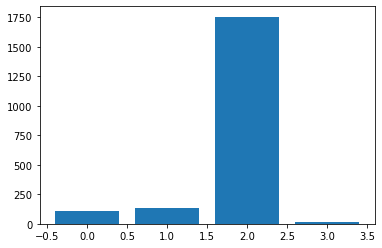

In [53]:
#plotting the Group
plt.bar(data['Group'].unique(),data['Group'].value_counts())
plt.show()

In [54]:
#making data ready to splitted in the below processes.
#popping the 'Group' into 'y'.
#and the remaining we put in the 'x'.
y = data.pop('Group')
x = data

In [55]:
pd.unique(y)
#2 is Normal Cognition
#1 is Mild Dementia
#0 is Moderate Dementia
#3 is Severe Dementia

array([2, 1, 0, 3])

In [56]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [57]:
#splitting the data in 80-20 for train-test
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42,test_size=0.2)

In [58]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

# SGD (Stochastic Gradient Descent)

In [59]:
#Generate stochastic gradient descent (SGD) classifier object
sgd = SGDClassifier(random_state=42)

In [60]:
#fitting and predicting SGD model
sgd.fit(X_train, y_train)
sgd.predict(X_test)

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [61]:
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=7)#computing count of predicted y values
confusion_matrix(y_train, y_train_pred) # actual vs predicted

array([[   2,   16,   81,    1],
       [   6,   51,   17,    3],
       [   2,   13, 1403,    0],
       [   0,    7,    3,    3]], dtype=int64)

In [62]:
#Check accuracy
cross_val_score(sgd, X_train, y_train, cv=7, scoring="accuracy")

array([0.9       , 0.90869565, 0.9       , 0.90434783, 0.91304348,
       0.91266376, 0.91266376])

# MLP (Multilayer Perceptron)

In [63]:
#importing useful libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [64]:
#creating MLP classifier with three hidden layers of 40, 20 and 7 nodes with max iterations set to 500
dnn_clf = MLPClassifier(hidden_layer_sizes=(40,20,7),
                       max_iter=1000)

dnn_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 20, 7), max_iter=1000)

In [65]:
#checking number of iterations without early stopping 
dnn_clf.n_iter_

200

In [66]:
#predicting and checking the confusion matrix along with accuracy score
test_y_pred = dnn_clf.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, test_y_pred))
print('Accuracy Score: %.3f' %  accuracy_score(y_test, test_y_pred))

Confusion Matrix
[[ 15   4  16   0]
 [  3  20   4   2]
 [  5   8 323   0]
 [  0   2   0   1]]
Accuracy Score: 0.891


## MLP with early stopping

In [72]:
#creating MLP classifier with three hidden layers of 40, 20 and 7 nodes with max iterations set to 1000
dnn_clf = MLPClassifier(hidden_layer_sizes=(40,20,7),
                       max_iter=1000, early_stopping=True)

dnn_clf.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(40, 20, 7),
              max_iter=1000)

In [73]:

#checking number of iterations without early stopping 
dnn_clf.n_iter_

33

In [74]:
#predicting and checking the confusion matrix along with accuracy score
test_y_pred = dnn_clf.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, test_y_pred))
print('Accuracy Score: %.3f' %  accuracy_score(y_test, test_y_pred))

Confusion Matrix
[[  0   4  31   0]
 [  1  22   6   0]
 [  0   4 332   0]
 [  0   3   0   0]]
Accuracy Score: 0.878


## MLP with change of Solver (Optimizer) in MLP 

In [75]:
#Let's use Stochastic Gradient Descent optimizer

dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,
                       activation = 'relu',
                       solver='sgd')

dnn_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=1000, solver='sgd')

In [76]:
test_y_pred = dnn_clf.predict(X_test)

print(accuracy_score(y_test, test_y_pred))

0.8933002481389578


In [ ]:
#the deep learning classifiers(SGD) as well as DNN MLP results keep on fluctuating between 80-90%. as it is the nature of NN.

#Other models are almost having the same accuracy in each runs.